In [2]:
# The aim is to construct clusters for three sets of variables generated from PolicyScores.ipynb and check the optimal number
# of clusters using specific validation statistic scores

import pandas as pd
import numpy as np
from functools import reduce

import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import AgglomerativeClustering, KMeans

# 1. Assigning clusters 

# Function to assign clusters based on wald algorithm that minimizes the ssd within clusters

def cluster(X,n):
    clsmodel = AgglomerativeClustering(n_clusters=n, linkage='ward').fit(X)
    return pd.Series(clsmodel.fit_predict(X), index = X.index[:])

# Function to plot a dendrogram

def plot_dendrogram(X,threshold):   
    plt.style.use('ggplot')
    %matplotlib notebook

    proname = {11:'Beijing',12:"Tianjin",13:'Hebei',14:'Shanxi',15:'Inner Mongolia',21:'Liaoning',22:'Jilin',23:'Heilongjiang',
              31:'Shanghai',32:'Jiangsu',33:'Zhejiang',34:'Anhui',35:'Fujian',36:'Jiangxi',37:'Shandong',41:'Henan',42:'Hubei',
               43:'Hunan',44:'Guangdong',45:'Guangxi',46:'Hainan',50:'Chongqing',51:'Sichuan',52:'Guizhou',53:'Yunnan',54:'Xizang',
              61:'Shaanxi',62:'Gansu',63:'Qinghai',65:'Xinjiang'}

    from scipy.cluster.hierarchy import ward, dendrogram
    plt.figure()
    dendrogram(ward(X), labels=[proname[procode] for procode in X.index[:]], color_threshold=threshold)
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
    plt.subplots_adjust(bottom=0.26)
    plt.gca().tick_params(bottom=False, left=False)
    plt.show()


<IPython.core.display.Javascript object>


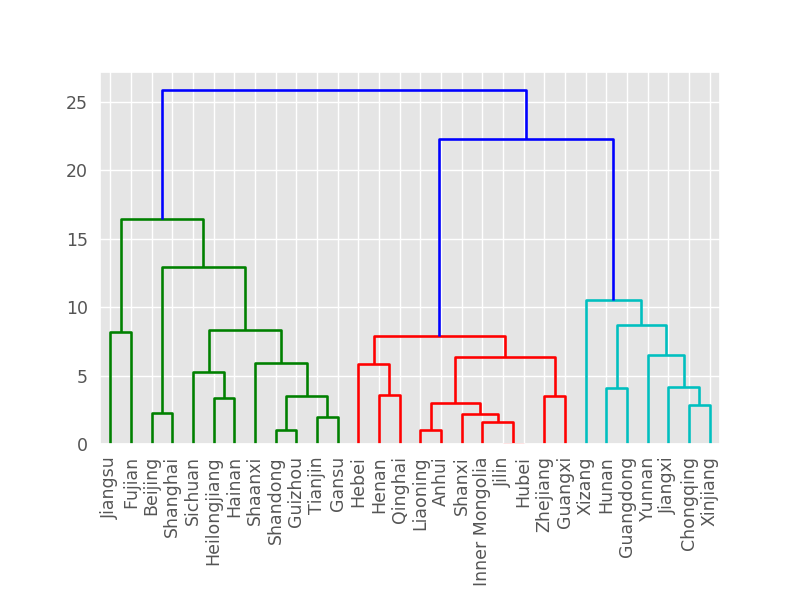

In [56]:
# 1.1 Assign clusters to outcomes disaggregated poicy areas 

X0 = pd.read_excel("Scores_Province_Area.xlsx", index_col=0)

X1 = X0.loc[:,["ts_int", "as_int", "lts_sel", "las_sel", 
                "ts_small", "ts_medium", "ts_big", "ts_mega",
                "as_small", "as_medium", "as_big", "as_mega"]]

X2 = X0.loc[:,['ts_int','as_int','lts_sel','las_sel','ts_sel','as_sel',
                "ts_small", "ts_medium", "ts_big", "ts_mega",
                "as_small", "as_medium", "as_big", "as_mega"]]

X3 = X0.loc[:,['ts_int','as_int','lts_sel','las_sel','ts_sel','as_sel',
                "ts_small", "ts_medium", "ts_big_mega",
                "as_small", "as_medium", "as_big_mega"]]

W1 = X0.loc[:,['ts_int','as_int','wlts_sel','wlas_sel',
                "wts_small", "wts_medium", "wts_big", "wts_mega",
                "was_small", "was_medium", "was_big", "was_mega"]]

W2 = X0.loc[:,['ts_int','as_int','wlts_sel','wlas_sel','wts_sel','was_sel',
                "wts_small", "wts_medium", "wts_big", "wts_mega",
                "was_small", "was_medium", "was_big", "was_mega"]]

W3 = X0.loc[:,['ts_int','as_int','wlts_sel','wlas_sel','wts_sel','was_sel',
                "wts_small", "wts_medium", "wts_big_mega",
                "was_small", "was_medium", "was_big_mega"]]

## X 和 W 最佳，X分3个，W分4个 
cluster(X2, 3)
#plot_dendrogram(X2, 30)


# 1.2 Assign clusters to covariates disaggregated by policy tools

Y = pd.read_excel('Scores_Province_Tools.xlsx', index_col=0).iloc[:, 4:]
cluster(Y, 3)
#plot_dendrogram(Y, 10)


# 1.3 Assign clusters to covariates disaggregated by city sizes

Z0 = pd.read_excel("Scores_City.xlsx", index_col=0)

def Z(prefix):
    return Z0.loc[:, [col for col in Z0.columns if col.find(prefix) != -1][:14]]

Z_cls = pd.DataFrame({"small_cls": cluster(Z("small"), 3), "medium_cls": cluster(Z("medium"), 3), 
                      "big1_cls": cluster(Z("big1"), 3), "big2_cls": cluster(Z("big2"), 3), "mega_cls": cluster(Z("mega"), 3)})

#plot_dendrogram(Z("small"), 15)
#plot_dendrogram(Z("medium"), 15)
plot_dendrogram(Z("big1"), 20)
#plot_dendrogram(Z("big2"), 20)
#plot_dendrogram(Z("mega"), 30)

In [51]:
# 2. Choice of cluster number: validation statistic

from sklearn.metrics import silhouette_score as sh, calinski_harabaz_score as ch, davies_bouldin_score as db
# Higher sh, ch and lower db value indicates better clutering results

def stat(X, alg_score, name = None):
    if alg_score == ch:
        scores = [0.01*(alg_score(X,cluster(X,i))) for i in range(2,30)]
    else:
        scores = [alg_score(X,cluster(X,i)) for i in range(2,30)]
     
    return scores

def plot_stat(X):
    %matplotlib notebook
    fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    ax1.plot(range(2,30), stat(X, sh), color='#CD6155',label='Silhouette score')
    #ax1.plot(range(2,30), stat(X, db), color='#AF7AC5', label='Davies Bouldin score')
    ax1.plot(range(2,30), stat(X, ch), color='#7FB3D5', label='Calinski haradaz score')


    ax2.plot(range(2,6), stat(X, sh)[:4], color='#CD6155',label='Silhouette score')
    #ax2.plot(range(2,6), stat(X, db)[:4], color='#AF7AC5', label='Davies Bouldin score')
    ax2.plot(range(2,6), stat(X, ch)[:4], color='#7FB3D5', label='Calinski haradaz score')

    ax2.set_xticks([2,3,4,5])

    for spine in ['top', 'right']:
        ax1.spines[spine].set_visible(False)
        ax2.spines[spine].set_visible(False)

    fig.text(0.5,0.02,'Number of Clusters', ha='center',fontsize=10)
    fig.suptitle('Integraion Clustering Indices\n rp, unify, insurances, service', fontsize=10)
    plt.legend()

<IPython.core.display.Javascript object>


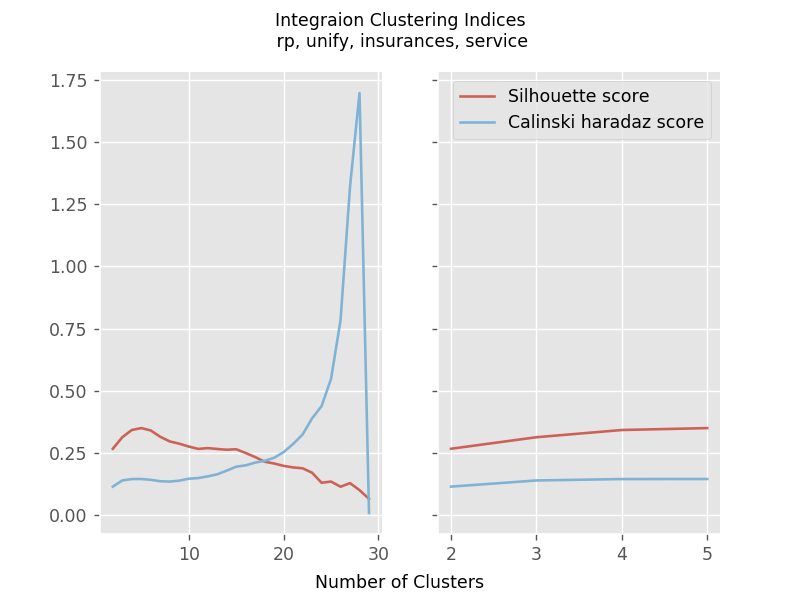

In [62]:
plot_stat(Z("big1"))